In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
from itertools import combinations

from sklearn.preprocessing import StandardScaler
import torch

## Load the Data

In [3]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_1/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_1/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Output
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
4,0.650114,0.681526,-3.606063e-03
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48


In [4]:
#Add feedback

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Output':1.36e-134}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# 5 may
new_data=[0.75,0.6,1.84506867231124E-12]
df.loc[len(df)] = new_data

new_data=[0.05,0.95,4.406064392151E-291]
df.loc[len(df)] = new_data


# 10 may
new_data=[0.6,0.6,0.0255592853398297] #*******
df.loc[len(df)] = new_data

new_data=[0.99,0.99,5.3094306962609E-183]
df.loc[len(df)] = new_data

new_data=[0.99,0.01,0]
df.loc[len(df)] = new_data

#17 may
df.loc[len(df)]=[0.434343,0.454545,0.028354367256360813]  #******

#19 MAY
df.loc[len(df)]=[0.676768,0.05,3.1259374105081E-142]
df.loc[len(df)]=[0.050001,0.565656,-2.7013862960671E-111]

#2 jun
df.loc[len(df)]=[0.484849,0.484849,1.75981312307345E-06]

#10 jun
df.loc[len(df)]=[0.489179,0.502706,0.0000000152]
df.loc[len(df)]=[0.649999,0.400001,-4.59E-37]

#18 jun
df.loc[len(df)]=[0.40015,0.600044,1.43311345784438E-23]
df.loc[len(df)]=[0.394553,0.480802,-0.000383029826414517]

#18 jun
df.loc[len(df)]=[0.377377,0.491491,3.14722953886701E-06]

#22 jun
df.loc[len(df)]=[0.331982,0.537117,1.07958836258458E-16]

#28 jun
df.loc[len(df)]=[0.596487,0.614104,0.0660500518176612]
df.loc[len(df)]=[0.599019,0.614765,0.118581977643138] #** new max

#1 jul
df.loc[len(df)]=[0.59955,0.613964,0.123809583005568] 
df.loc[len(df)]=[0.59982,0.613604,0.126651330212406] #** new max

#6 jul
df.loc[len(df)]=[0.60087,0.614387,0.1610653118672] #** new max

#9 jul
df.loc[len(df)]=[0.602356,0.614037,0.199409617321992] #** new max

# 13 jul
df.loc[len(df)]=[0.603825,0.613364,0.235145538995443] #** new max

# 15 jul
df.loc[len(df)]=[0.606235,0.613074,0.314673805523911] #** new max

# 20 jul
df.loc[len(df)]=[0.608156,0.614445,0.433831086453572] #** new max


#Print
df


,Input_1,Input_2,Output
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
4,0.650114,0.681526,-3.606063e-03
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48


In [5]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

Basic Statistical Summary:
         Input_1    Input_2         Output
count  35.000000  35.000000   3.500000e+01
mean    0.533851   0.535693   5.226137e-02
std     0.237220   0.240183   1.034549e-01
min     0.050000   0.010000  -3.606063e-03
25%     0.397351   0.467673  1.562969e-142
50%     0.599550   0.600000   1.433113e-23
75%     0.650057   0.614416   4.720221e-02
max     0.990000   0.990000   4.338311e-01


In [6]:
# File paths SEGUNDO SET
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_1/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data_secondSet/function_1/initial_outputs.npy"

# Load the data
inputs2 = np.load(input_file_path)
outputs2 = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df2 = pd.DataFrame(inputs2, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df2['Output'] = outputs2

df2

,Input_1,Input_2,Output
0,0.900482,0.469967,-3.238312e-70
1,0.862435,0.435286,-2.665550e-65
2,0.093113,0.315207,-6.534562e-84
3,0.489754,0.168448,1.332085e-48
4,0.901327,0.673665,2.942125e-55
5,0.321017,0.634971,8.335161e-40
6,0.320447,0.420307,-5.039820e-08
7,0.638618,0.738397,-2.010077e-09
8,0.596486,0.614080,6.591476e-02
9,0.483667,0.319428,5.595491e-11


In [7]:
df = pd.concat([df, df2], ignore_index=True)
df


,Input_1,Input_2,Output
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
4,0.650114,0.681526,-3.606063e-03
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48


# Function 1: Searching for Contamination Sources

### This may sound simple because you only have a two-dimensional input, however it is a very difficult problem. It corresponds to trying to find the source of radiation in some square area. However, you can only detect the radiation once you are very close to it, meaning most of the readings will be zero. There are two sources, one is not too dangerous, so make sure you try to find both modes of the function.

There was a component of luck here, so i was playing with both exploration and explotation at the same time since the beginning as it seemed that areas with contamination were tightly close
I was playing with many transofmration of the data to emphasize or make more notorious those places with 'non-zero' outputs. 
In multiple cases i used the query model with transformed outputs under different functions as the 'standard' saclaing wasn't enough. Once i got larger sets of data, regular scaling started working similar to the transfomrations i was doing

## Data exploration

In [11]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2        Output
count  55.000000  55.000000  5.500000e+01
mean    0.541391   0.528527  3.445702e-02
std     0.247395   0.229860  8.590873e-02
min     0.050000   0.010000 -3.606063e-03
25%     0.397351   0.411897 -1.044547e-91
50%     0.596486   0.582652  1.332085e-48
75%     0.650057   0.620742  3.899966e-06
max     0.990000   0.990000  4.338311e-01

Missing values in the dataset:
Input_1    0
Input_2    0
Output     0
dtype: int64


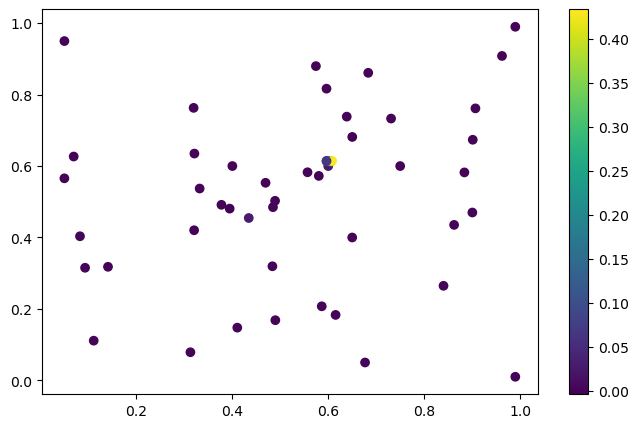

In [12]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(df['Input_1'], df['Input_2'], c = df['Output'])
plt.colorbar();

(0.605, 0.625)

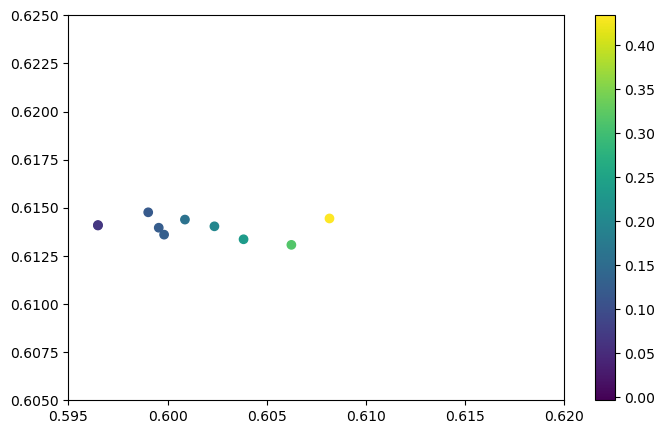

In [13]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(df['Input_1'], df['Input_2'], c = df['Output'])
plt.colorbar();
plt.xlim(0.595, 0.62)  # Set x-axis limits
plt.ylim(0.605, 0.625)  # Set y-axis limits

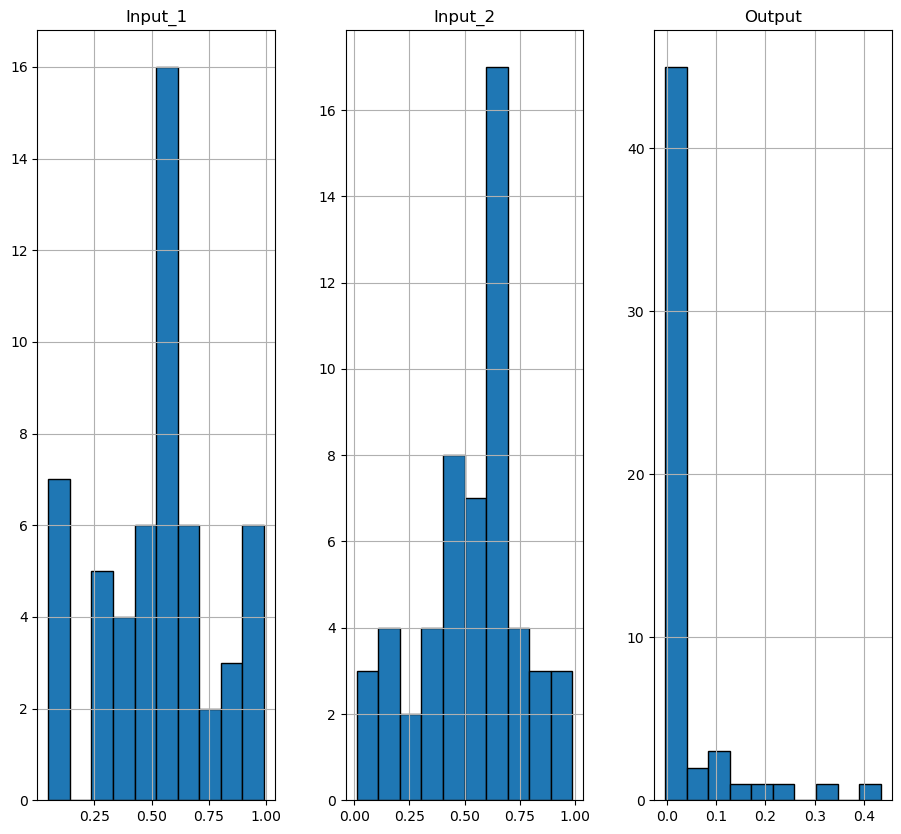

In [14]:
# Plot histograms for each column to understand distributions
df.hist(bins=10, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.25)
plt.show()

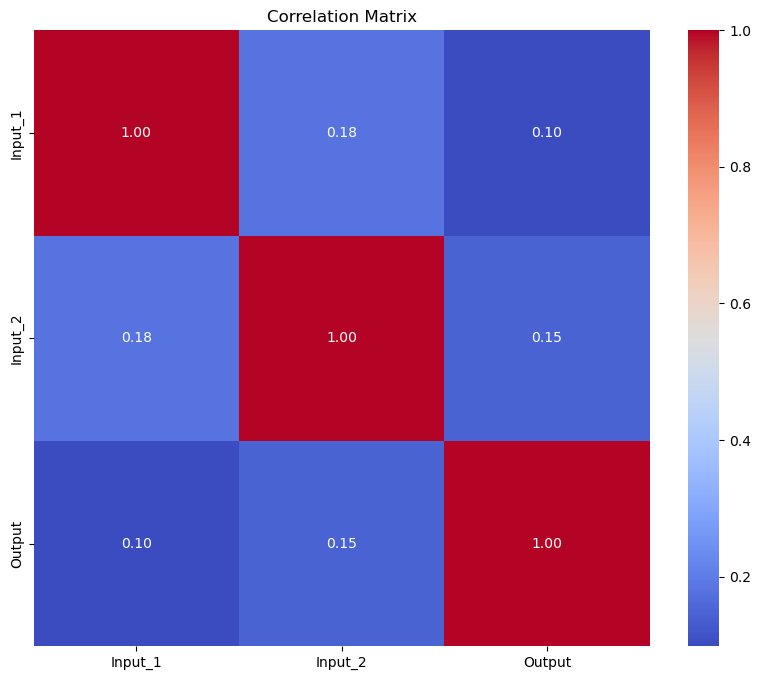

In [15]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

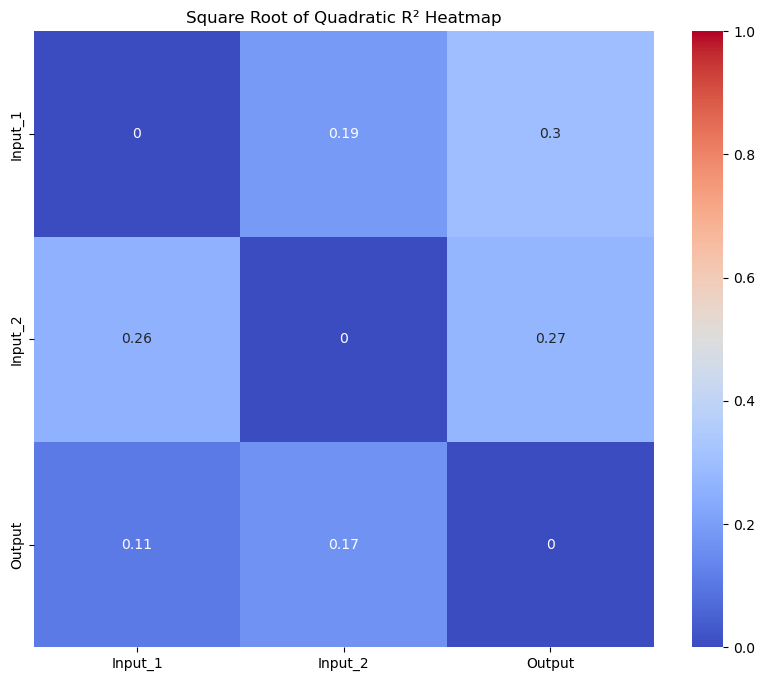

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def compute_quadratic_sqrt_r2(x, y):
    x = x[:, np.newaxis]
    polynomial_features = PolynomialFeatures(degree=2)
    x_poly = polynomial_features.fit_transform(x)
    
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    
    return np.sqrt(r2_score(y, y_poly_pred))

def quadratic_sqrt_r2_matrix(data):
    cols = data.columns
    sqrt_r2_matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), columns=cols, index=cols)
    
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:
                sqrt_r2_matrix.iloc[i, j] = compute_quadratic_sqrt_r2(data[cols[i]].values, data[cols[j]].values)
    
    return sqrt_r2_matrix

def plot_heatmap(sqrt_r2_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(sqrt_r2_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title('Square Root of Quadratic R² Heatmap')
    plt.show()


# Compute square root of R² matrix
sqrt_r2_matrix = quadratic_sqrt_r2_matrix(df)

# Plot heatmap
plot_heatmap(sqrt_r2_matrix)

## FOR THIS CASE ONLY (Model 1)
### Transform the Output to explore further as this are very small contamination numbers

Basic Statistical Summary:
         Input_1    Input_2        Output  Log_Output
count  55.000000  55.000000  5.500000e+01   55.000000
mean    0.541391   0.528527  3.445702e-02  -90.307167
std     0.247395   0.229860  8.590873e-02   86.999094
min     0.050000   0.010000 -3.606063e-03 -230.258509
25%     0.397351   0.411897 -1.044547e-91 -157.051136
50%     0.596486   0.582652  1.332085e-48  -60.030753
75%     0.650057   0.620742  3.899966e-06   -8.724125
max     0.990000   0.990000  4.338311e-01   -0.835100


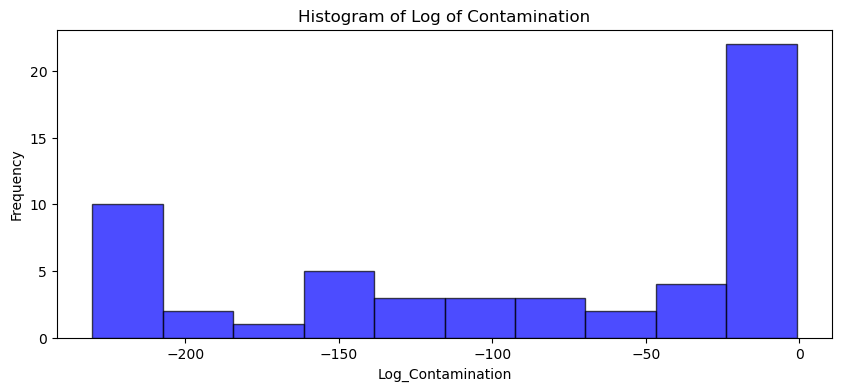

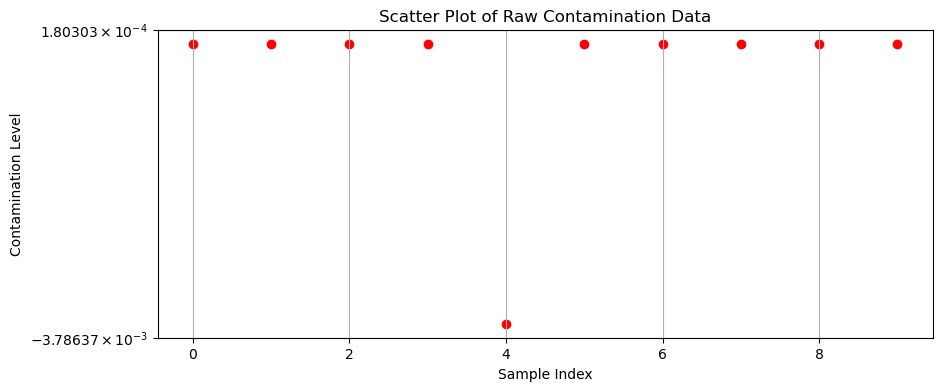

In [18]:
# Transform data: Apply a logarithmic transformation
# Small epsilon to avoid log(0) issues, assuming all values are supposed to be non-negative
epsilon = 1e-100
df['Log_Output'] = np.log(df['Output'].abs() + epsilon)
#print(df['Log_Output'])

# Basic Statistics
print("Basic Statistical Summary:")
print(df.describe())

# Histograms to explore each variable
plt.figure(figsize=(10, 4))
plt.hist(df['Log_Output'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Log of Contamination')
plt.xlabel('Log_Contamination')
plt.ylabel('Frequency')
plt.show()

# Additional plot to show raw data
plt.figure(figsize=(10, 4))
plt.scatter(range(len(outputs)), outputs, color='red')
plt.title('Scatter Plot of Raw Contamination Data')
plt.xlabel('Sample Index')
plt.ylabel('Contamination Level')
plt.yscale('symlog')  # Using a symmetric log scale due to negative values
plt.grid(True)
plt.show()

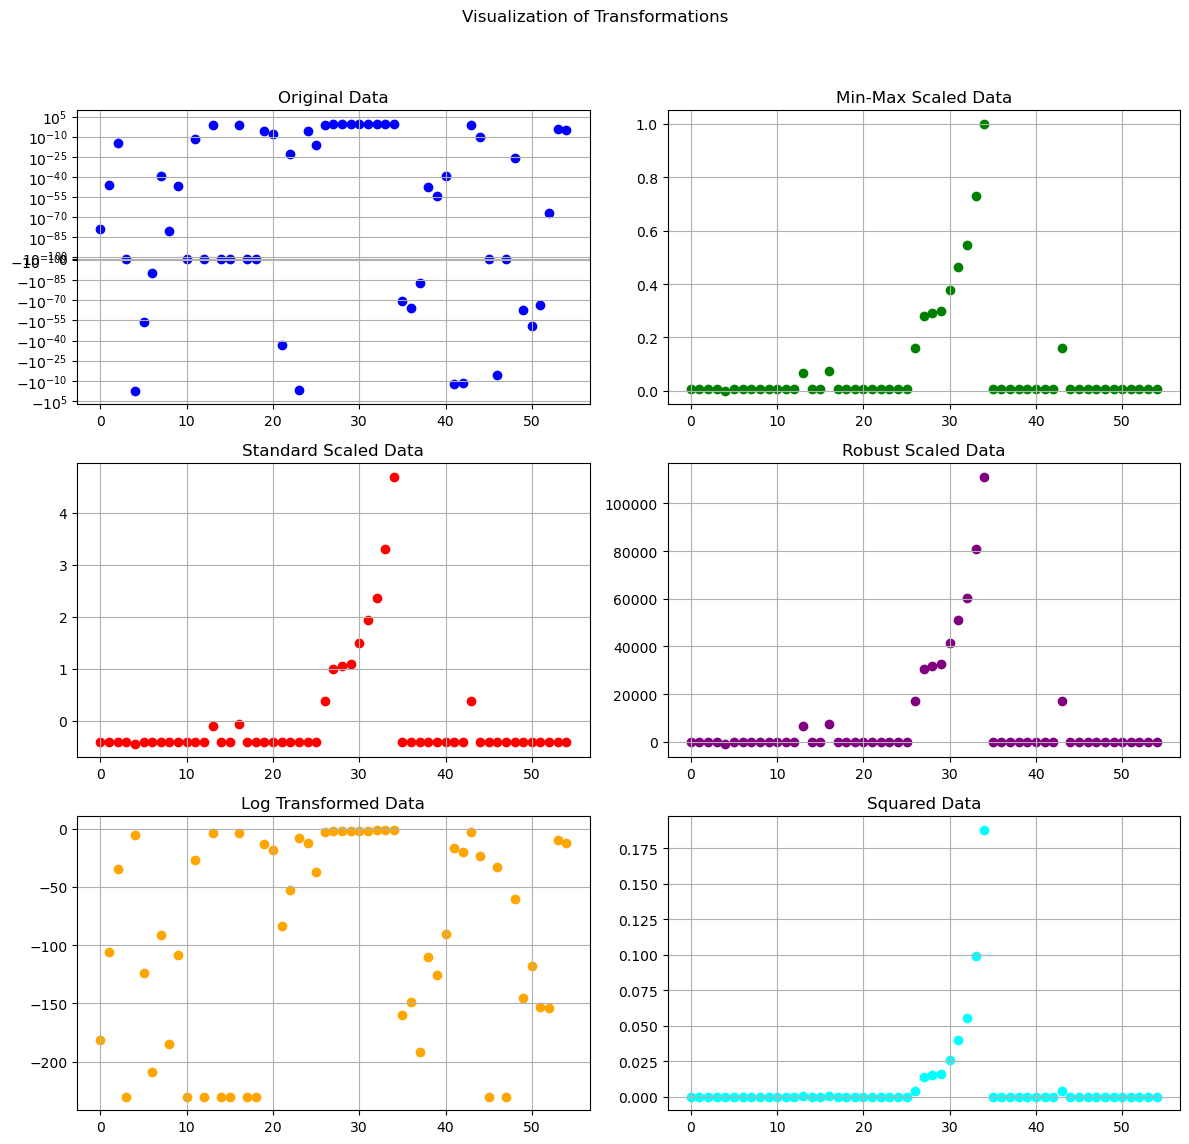

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import norm

# Applying various transformations
scaler_min_max = MinMaxScaler()
df['Min_Max_Scaled'] = scaler_min_max.fit_transform(df[['Output']])

scaler_standard = StandardScaler()
df['Standard_Scaled'] = scaler_standard.fit_transform(df[['Output']])

scaler_robust = RobustScaler()
df['Robust_Scaled'] = scaler_robust.fit_transform(df[['Output']])

# Log transformation with a small shift to handle zero and negative values
epsilon = 1e-100  # Small constant to avoid log(0)
df['Log_Transformed'] = np.log(df['Output'].abs() + epsilon)

# Square transformation
df['Squared'] = np.power(df['Output'], 2)

# Plotting the original and transformed data
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Visualization of Transformations')

# Original Data
axes[0, 0].scatter(df.index, df['Output'], color='blue')
axes[0, 0].set_title('Original Data')
axes[0, 0].set_yscale('symlog', linthresh=epsilon)
axes[0, 0].grid(True)

# Min-Max Scaled Data
axes[0, 1].scatter(df.index, df['Min_Max_Scaled'], color='green')
axes[0, 1].set_title('Min-Max Scaled Data')
axes[0, 1].grid(True)

# Standard Scaled Data
axes[1, 0].scatter(df.index, df['Standard_Scaled'], color='red')
axes[1, 0].set_title('Standard Scaled Data')
axes[1, 0].grid(True)

# Robust Scaled Data
axes[1, 1].scatter(df.index, df['Robust_Scaled'], color='purple')
axes[1, 1].set_title('Robust Scaled Data')
axes[1, 1].grid(True)

# Log Transformed Data
axes[2, 0].scatter(df.index, df['Log_Transformed'], color='orange')
axes[2, 0].set_title('Log Transformed Data')
axes[2, 0].grid(True)

# Squared Data
axes[2, 1].scatter(df.index, df['Squared'], color='cyan')
axes[2, 1].set_title('Squared Data')
axes[2, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Tracking of potential queries, submissions and historical notes

#### 28 Apr. Ask 1. [0.050000-0.950000]

- Casi todo me da explorar un query=(0,1) porque es area inexplorada

- Con lengthscale = 0.1, q:(0,1)
- Con Beta=0, q:(0.80-0,75), y hacia esa zona dependiendo de Beta

Con el rango en 0.1 y 0.9, me arroja ir hacia (0.4,0.46).......sin GRANDECIN esto es (0.51,0.47)
Con el rango en 0,6 y 0,8, me arroja ir hacia (0.75,0,60)

#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.750000-0.600000]
- [0.050000-0.950000]

#### 10 may
- Explorando desde 0 hasta 1, todo normal. (1,0) o podria ser (1,1)....(0.92,0.81) con mucho ruido
- Con rango 0.6-0.8: (0.6,0.6) si manejamos el rango de 
- Si lo abro a 0.6-1, me sigue dando el 1,1
- [0.600000-0.600000]
- [0.990000-0.990000]
- [0.990000-0.010000]

#### 14may
Se alcanzo un nuevo maximo en 0.6,0.6 OJO CON ESTO. 
- LAs correlacionese cayeron significativamente. lo cual indica que son areas muy especificas donde hay informacion.
***
- Con todos los datos y distintos niveles de ruido y lenght ([0.676768-0.000000])
- Sin ruido me manda mas hacia el 0.5 (0.535354-0.515152]) y [0.454545-0.464646]
- Quitando la obervacion outlier negativa:
-   Beta casi CERO [0.444444-0.515152]
-   Beta 2.6 [0.666667-0.000000]
-   o tambien Beta casi CERO [0.535354-0.585859]

*** Cuando hago todo con la transformacion cuadratica
- Beta casi CERO [0.535354-0.515152]
- Beta 2.6 [0.434343-0.454545]
- ONLY std [0.676768-0.000000]
*** SIN OBSERVACION Itlier:
-  Beta casi CERO [0.535354-0.585859]
-  Beta 2.6 [0.414141-0.464646]
-  ONLY std [0.676768-0.000000]

***** Nos vamos a ir por  [0.434343-0.454545]***

#### 17 may
Se alcanzo nuevo maximo en ***
- De nuevo,con varias combinaciones me manda [0.676768-0.050000]
- Si me voy hacia Beta=0, sigue siendo hacia 0.47 y 0.55 de ambos lados, asi que mejor vemos la transformacion
*** Con transformacion quad: [0.505051-0.484848]
*** Con optimizador log [0.404041-0.464647], Beta 2.6 [0.000001-0.565656]
*** CONCLUSION. Tengo dos areas por explora para tener las dos fuentes: [0, 0,56] y [0.67,0]. y tambien tengo varios puntos alrededor del maximo.

******* Me voy por explorar y acotar las areas [0.676768-0.050000] y [0.050001-0.565656]

#### 1 Junio
 *** Loglikelihood normal
- Beta 1.96 [0.464647-0.474748]
- Beta casi CERO [0.474748-0.484849]
*** Loglikelihood con transformacion
Beta 1.96 [0.484849-0.484849]+
Beta 2.6 [0.484849-0.474748]
*** Con transformacion y sin outlier
- Beta 1.96 [0.595960-0.383838]
- Beta casi CERO [0.494949-0.525253]
- Beta 2.6 [0.595960-0.363636]
- ****** Voy por [0.484849-0.484849]

#### 7 jun
- * Transformo datos y log likelihood
- Beta 1.96 [0.484849-0.494950]
- * Log likelihood normal con datos escalados
- Beta 1.96 [0.434870-0.454910]
- Next query point EI: [0.649298-0.681362]
- * Log likelihood normal con datos escalados y sin outlier
- Beta 1.96 [0.498998-0.511022]
- en rango acotado Next query point EI: [0.649999-0.400001]++
- *** Sin outlier, tranformacion y loglikelihood con scaler
- Beta 1.96 [0.489179-0.502706]++
- Next query point EI: [0.649999-0.400001]++


- ****** Voy por [0.489179-0.502706] y [0.649999-0.400001]

#### 12 jun
- * Transformo datos y log likelihood con scaler (sin outlier es muy similar)
- Beta 1.96 [0.423047-0.447596]
- Beta casi CERO [0.433568-0.454109]
- Next query point EI: [0.509720-0.478658]
- Next query point PI: [0.484169-0.483668]

- * Transoformo datos y Log likelihood SIN scaler - En la grafica me gusta como se ve este.
- Beta 1.96 [0.477656-0.504209]
- Beta casi CERO [0.484670-0.506714]
- Next query point EI: [0.649999-0.649999]
- Next query point PI: [0.649999-0.649999]

- * NO Transformo, pero sí escalo. Log likelihood normal con datos escalados
- Beta 1.96 [0.422045-0.447596]
- Beta casi CERO [0.433568-0.454109]
- Next query point EI: [0.649999-0.649999]
- Next query point PI: [0.484169-0.483668]

- TORCH
- TS: [0.400150-0.600044] ++
- EI: [0.353403-0.997757]
- UCB: [0.394553-0.480802] +
- UCB-Z: [0.427731-0.489973]

- ****** Voy por [0.400150-0.600044] y [0.394553-0.480802]

#### 18 jun

- Normal scaler log likelihood
Beta 1.96 [0.439079-0.450602]
Beta casi CERO [0.434570-0.454610]
Beta 2.6 [0.442085-0.453107]
ONLY std [0.451604-0.649999]
Next query point EI: [0.473147-0.497195]
Next query point PI: [0.489179-0.502706]

- Transformacion, sin scaler y log likelihood
Beta 1.96 [0.495692-0.503708]
Beta casi CERO [0.498197-0.507215]
Beta 2.6 [0.494690-0.502205]
ONLY std [0.649999-0.400001]
Next query point EI: [0.649999-0.649999]
Next query point PI: [0.649999-0.649999]

- Nuevo modelo mas robusto
Next query point UCB with Beta 0.01: [0.434434-0.454454]
Next query point UCB with Beta 1.96: [0.438438-0.447447]
Next query point UCB with Beta 2.6: [0.439439-0.445445]
Next query point EI: [0.377377-0.491491]
Next query point PI: [0.050050-0.565566]

- *** VOY POR [0.377377-0.491491]como miercoles de exploracion

#### 22 jun

Sin transformar todo, solo escalar

-Normal
Next query point UCB with Beta 1.96: [0.439009-0.443964]
Next query point UCB with Beta 0.01: [0.435045-0.453874]
Next query point UCB with Beta 4: [0.440991-0.436036]
Next query point UCB with Beta 8: [0.440991-0.426126]
Next query point UCB with Beta 12: [0.442973-0.421171]
Next query point UCB with Beta 16: [0.440991-0.417207]

Sin la mas grande
Next query point UCB with Beta 1.96: [0.591622-0.585676]
Next query point UCB with Beta 0.01: [0.599550-0.598559]
Next query point UCB with Beta 1.96: [0.591622-0.585676]


Sin las dos mas grandes
Next query point UCB with Beta 1.96: [0.331982-0.537117]++
Next query point UCB with Beta 0.01: [0.351802-0.509369]

- ** [0.331982-0.537117] explorar en lugares diferentes

#### 26 jun
             - ****** new max [0.596486-0.614080]

- Sin transf, solo scale
Next query point UCB with Beta 1.96: [0.594725-0.613884]
Next query point UCB with Beta 0.01: [0.596487-0.614104] ++ (good max)
Next query point UCB with Beta 2.6: [0.599019-0.614765] ** (New max)

- *** Vamos por[0.596487-0.614104] y [0.599019-0.614765]**

#### 28 jun

- Todo el rango
Next query point UCB with Beta 0.01: [0.599599-0.614615]
Next query point UCB with Beta 1.96: [0.599599-0.614615]
Next query point UCB with Beta 2.6: [0.599599-0.613614]
Next query point UCB with Beta 4: [0.599599-0.613614]

- rango acotado
Next query point UCB with Beta 0.01: [0.599099-0.614685] 
Next query point UCB with Beta 1.96: [0.599369-0.614144]
Next query point UCB with Beta 2.6: [0.599550-0.613964] **
Next query point UCB with Beta 4: [0.599820-0.613604]++ *** new max

- ** Vamos por [0.599550-0.613964]** y [0.599820-0.613604]

#### 1 jul

Next query point UCB with Beta 0.01: [0.600105-0.614027]
Next query point UCB with Beta 1.96: [0.600870-0.614387] ++
Next query point UCB with Beta 2.6: [0.601141-0.614477]
Next query point UCB with Beta 4: [0.601726-0.614747]

- *** Vampos por [0.600870-0.614387] ** new max

#### 6 jul

Next query point UCB with Beta 0.01: [0.601681-0.614432]
Next query point UCB with Beta 1.96: [0.602356-0.614037] ++ new max
Next query point UCB with Beta 2.6: [0.602581-0.613892]

- *** Vamos por [0.602356-0.614037]

#### 9 jul

Next query point UCB with Beta 0.01: [0.603334-0.613835]
Next query point UCB with Beta 1.96: [0.603825-0.613364] ++
Next query point UCB with Beta 2.6: [0.603955-0.613074]

- ** Vamos por [0.603825-0.613364]

#### 13 jul

Next query point UCB with Beta 0.01: [0.605835-0.612834]
Next query point UCB with Beta 1: [0.606235-0.613074]   ++ new max
Next query point UCB with Beta 1.96: [0.606666-0.613404]
Next query point UCB with Beta 2.6: [0.606966-0.613645]

- ** Vamos por [0.606235-0.613074]

- #### 15 jul
Next query point UCB with Beta 0.01: [0.607796-0.613705]
Next query point UCB with Beta 1: [0.607996-0.614045]
Next query point UCB with Beta 1.96: [0.608156-0.614445] ++
Next query point UCB with Beta 2.6: [0.608256-0.614715] 

- ** Vamos por [0.608156-0.614445]

- #### 20 jul
- Next query point UCB with Beta 0.01: [0.609420-0.615593]
Next query point UCB with Beta 1: [0.609735-0.615818]
Next query point UCB with Beta 1.96: [0.610200-0.615968] 
Next query point UCB with Beta 2.6: [0.610770-0.615728] ++

- ** Vamos por [0.610770-0.615728]



# New model (optimized parameters)

In [37]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import itertools as it
import warnings
from sklearn.exceptions import ConvergenceWarning

In [41]:
# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Assuming df is already loaded with data
#df['transf_output'] = np.sign(df['Output']) * df['Output'] ** 2
#df['transf_output_1000'] = df['transf_output'] * 1000
#df['Output'] = df['transf_output_1000']

X = df[['Input_1', 'Input_2']].values
y = df[['Output']].values

# Standardize inputs and outputs
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1e-0, name='length_scale'),
    Real(1e-17, 1e-2, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X_scaled, y_scaled)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=32)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")

# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale) + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X_scaled, y_scaled)

# Flexible grid setup for predictions
def generate_grid(ranges, num_points):
    grid_axes = [np.linspace(start, end, num_points) for start, end in ranges]
    grid = np.array(list(it.product(*grid_axes)))
    return grid

# Define ranges for each input
input_ranges = [(0.59, 0.62), (0.60, 0.63)]  # Example ranges for two inputs (0.54, 0.64999999)

GG = 200  # Number of data points for each variable in the grid
X_grid = generate_grid(input_ranges, GG)
X_grid_scaled = scaler_X.transform(X_grid)  # Scale the grid points

# Predictions using the surrogate model
mean_scaled, std_scaled = GPR_model_best.predict(X_grid_scaled, return_std=True)
mean_scaled = mean_scaled.reshape(-1, 1)  # Reshape to 2D array
mean = scaler_y.inverse_transform(mean_scaled).flatten()  # Inverse transform to original scale and flatten to 1D array
std = std_scaled * scaler_y.scale_[0]  # Scale standard deviation appropriately

# Acquisition function: UCB
beta = 0.01
acquisition_function_ucb = mean + beta * std

# Find the next query point (UCB)
idx_max_ucb = np.argmax(acquisition_function_ucb)
next_query_ucb = X_grid[idx_max_ucb]
formatted_row_ucb = '-'.join(format(x, ".6f") for x in next_query_ucb)
print(f"Next query point UCB with Beta {beta}: [{formatted_row_ucb}]")


# Test different beta values for UCB and other acquisition functions
for beta in [1, 1.96, 2.6,4,8,12,16]:
    acquisition_function = mean + beta * std
    idx_max = np.argmax(acquisition_function)
    next_query = X_grid[idx_max]
    formatted_row = '-'.join(format(x, ".6f") for x in next_query)
    print(f"Next query point UCB with Beta {beta}: [{formatted_row}]")



/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 1e-17] before, using random point [0.45002994747102437, 0.004860417295816854]
  warnings.warn(
/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 1e-17] before, using random point [0.42119130766205326, 0.007932131338542541]
  warnings.warn(
/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 1e-17] before, using random point [0.5445406774437469, 0.001423812471226733]
  warnings.warn(
/opt/anaconda3/envs/sklearn_env/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 1e-17] before, using random point [0.03217711636509574, 0.006185670496808565]
  warnings

Best length scale: 0.10228309194065335
Best noise level: 1e-17
Next query point UCB with Beta 0.01: [0.609447-0.615528]
Next query point UCB with Beta 1: [0.609749-0.615829]
Next query point UCB with Beta 1.96: [0.610201-0.615980]
Next query point UCB with Beta 2.6: [0.610804-0.615678]
Next query point UCB with Beta 4: [0.611709-0.615226]
Next query point UCB with Beta 8: [0.613668-0.614472]
Next query point UCB with Beta 12: [0.614874-0.613869]
Next query point UCB with Beta 16: [0.615628-0.613417]


#### Run plots with 500 or 1000 grid/max ideally. If not, it takes too long and is not that useful

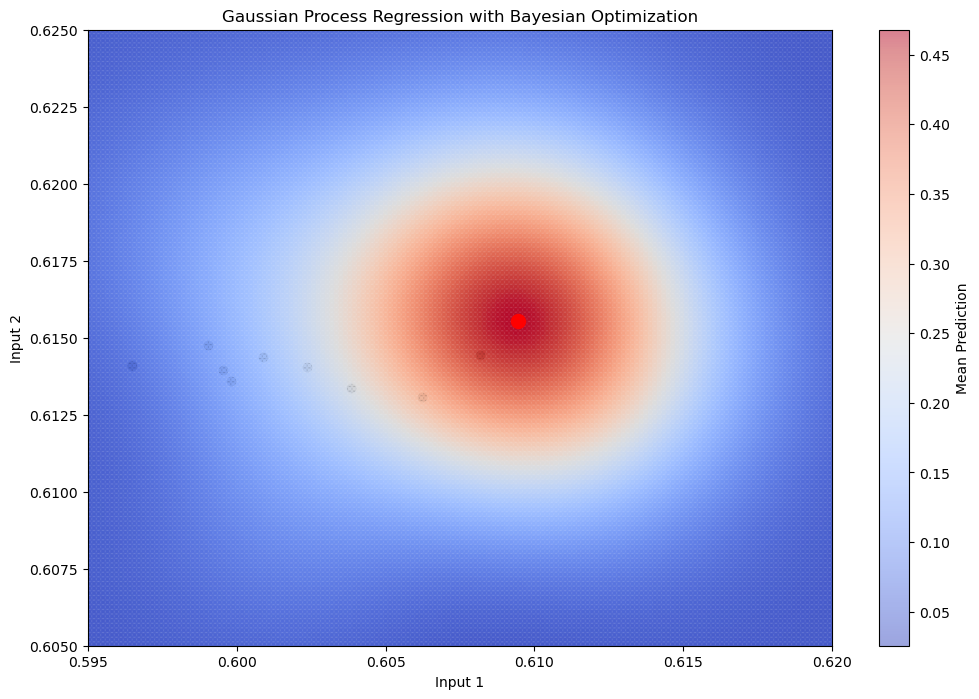

In [43]:
# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c='black', label='Data')
plt.scatter(X_grid[:, 0], X_grid[:, 1], c=mean, cmap='coolwarm', label='Mean Prediction', alpha=0.5)
plt.colorbar(label='Mean Prediction')
plt.scatter(next_query_ucb[0], next_query_ucb[1], color='red', s=100, label='Next Query Point (UCB)')
plt.title('Gaussian Process Regression with Bayesian Optimization')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.xlim(0.595, 0.62)  # Set x-axis limits
plt.ylim(0.605, 0.625)  # Set y-axis limits
plt.show()


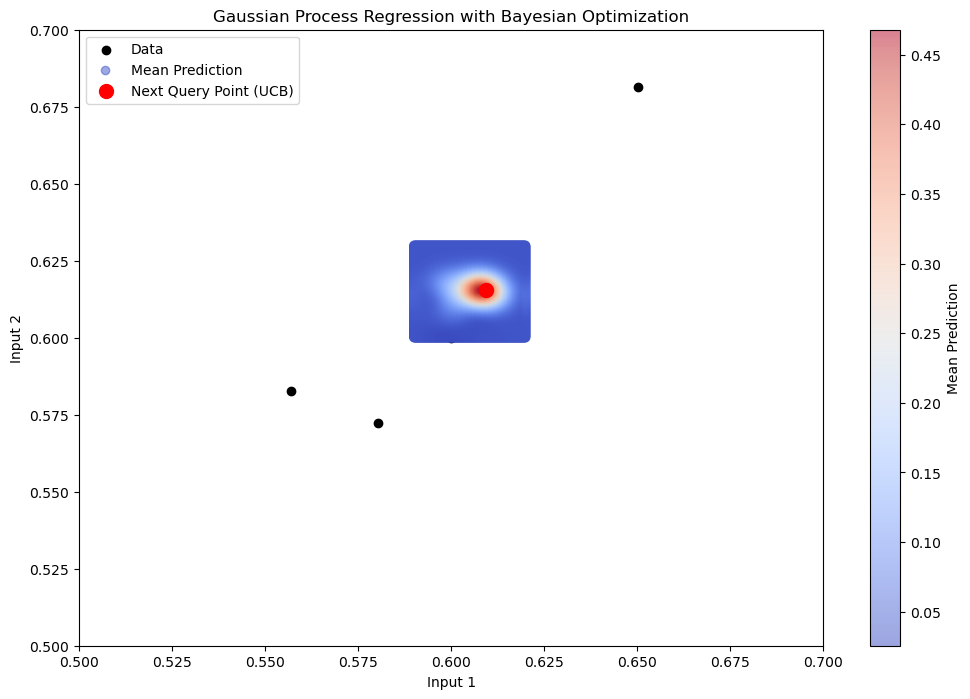

In [44]:
# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c='black', label='Data')
plt.scatter(X_grid[:, 0], X_grid[:, 1], c=mean, cmap='coolwarm', label='Mean Prediction', alpha=0.5)
plt.colorbar(label='Mean Prediction')
plt.scatter(next_query_ucb[0], next_query_ucb[1], color='red', s=100, label='Next Query Point (UCB)')
plt.title('Gaussian Process Regression with Bayesian Optimization')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.xlim(0.50, 0.70)  # Set x-axis limits
plt.ylim(0.50, 0.70)  # Set y-axis limits
plt.legend()
plt.show()